Universidad Galileo

Data Science at Work

PAPD - Sección V

Allied Global - Grupo 1.2


# Análisis Exploratorio de Datos

Se entregaron 5 datasets:
- Empleados.csv
- Empleados_amonestaciones.csv
- Empleados_planificacion_horarios.csv
- Empleados_vacaciones.csv
- Top_performers_2017_2020.csv

### Empleados.csv

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# from feature-engine
from feature_engine import missing_data_imputers as mdi

# for encoding with feature-engine
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [2]:
empleados = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Empleados_V2.csv',sep=",", encoding = "ISO-8859-1")
empleados.drop(['id_unidad','Puesto.1'], axis=1, inplace=True)
empleados

,Codigo_Empleado,Puesto,Pais,Fecha_Ingreso,edad,generacion,DEPARTMENT_NAME,ID_DEPARTAMENTO,unidad,Departamento,Municipio,Nacionalidad,GENERO,Site,Tipo_Salario_Contrato,Estatus_Empleado
0,C81E728D9,SUPERVISOR,GUATEMALA,2003-06-18,44,NaN,NaN,515,WORKFORCE GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,NaN,Permanente,RENUNCIA
1,ECCBC87E4,SUPERVISOR,GUATEMALA,2004-09-06,44,NaN,NaN,515,WORKFORCE GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,F,NaN,Permanente,RENUNCIA
2,A87FF679A,ANALISTA DE REPORTES,GUATEMALA,2005-01-14,45,NaN,NaN,510,CAPACITACION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,NaN,Permanente,RENUNCIA
3,E4DA3B7FB,ANALISTA DE REPORTES,GUATEMALA,2005-11-28,42,NaN,NaN,510,CAPACITACION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,F,NaN,Permanente,RENUNCIA
4,1679091C5,SUPERVISOR,GUATEMALA,2006-03-20,37,NaN,NaN,511,SUPERVISION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,NaN,Permanente,RENUNCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51405,6583FFF6F,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,25,360120.0,NaN,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,QUETZALTENANGO,NaN,GUATEMALTECO,M,PACIFIC CENTER,Permanente,ACTIVO
51406,7F0109703,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,34,360120.0,NaN,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,QUETZALTENANGO,NaN,GUATEMALTECO,M,PACIFIC CENTER,Permanente,ACTIVO
51407,65824241F,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,18,360120.0,NaN,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,GUATEMALA,GUATEMALA,GUATEMALTECO,F,PACIFIC CENTER,Permanente,ACTIVO
51408,611B6AEA1,ASESOR TELEFÓNICO CAPACITACIÓN,GUATEMALA,2020-11-09,36,360120.0,NaN,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,GUATEMALA,NaN,GUATEMALTECO,F,PACIFIC CENTER,Permanente,ACTIVO


#### Categorías Género:
Se puede observar que se tienen letras mayúsculas y minúsculas mezcladas. Se tranformará a que todas sean mayúsculas.

In [3]:
empleados.GENERO.unique()

array(['M', 'F', 'm', nan, 'f'], dtype=object)

In [4]:
empleados['GENERO'] = empleados['GENERO'].str.upper()

In [5]:
empleados.GENERO.unique()

array(['M', 'F', nan], dtype=object)

### Imputación de Categorías Faltantes

Se verifica cuantos faltantes existen en el dataset original

In [6]:
empleados.isnull().mean()

Codigo_Empleado          0.000000
Puesto                   0.000058
Pais                     0.000000
Fecha_Ingreso            0.000000
edad                     0.000000
generacion               0.691247
DEPARTMENT_NAME          0.286092
ID_DEPARTAMENTO          0.000000
unidad                   0.000000
Departamento             0.256584
Municipio                0.495429
Nacionalidad             0.000000
GENERO                   0.000097
Site                     0.090294
Tipo_Salario_Contrato    0.000233
Estatus_Empleado         0.000000
dtype: float64

Las categorías "Puesto", "GENERO" y "Tipo_Salario_Contrato" tienen menos del 5% de datos faltantes. Se utilizará una imputación del tipo "Categoría más frecuente"

In [7]:
# Se construye el imputador de Categoría más Frecuente
imputador_frecuencia = mdi.CategoricalVariableImputer(
    imputation_method='frequent', variables=['Puesto','GENERO','Tipo_Salario_Contrato'])

# Se entrena el imputador
imputador_frecuencia.fit(empleados)

# Se realiza la imputación
empleados = imputador_frecuencia.transform(empleados)

Las categorías "DEPARTMENT_NAME", "Departamento", "Municipio" y "Site" tienen más del 5% de valores faltantes, por lo que se hará una imputación a una categoría alternativa llamada "Missing"

In [8]:
# Se construye el imputador con indicador Missing
imputador_faltante = mdi.CategoricalVariableImputer(variables=['DEPARTMENT_NAME','Departamento','Municipio','Site'])

# Se entrena el imputador
imputador_faltante.fit(empleados)

# Se realiza la imputación
empleados = imputador_faltante.transform(empleados)

La categoría "generacion" tiene 69% de valores faltantes. Lo que se hará es una imputación por mediana y se agregará un indicador binario para una clase adicional, indicando la falta del dato.

In [9]:
# Se construye el imputador para indicador binario
imputador_binario = mdi.AddMissingIndicator(how='missing_only',variables=['generacion'])

# Se entrena el imputador
imputador_binario.fit(empleados)

#Se realiza la imputacion
empleados = imputador_binario.transform(empleados)

In [10]:
# Se construye el imputador con la Mediana
imputador_mediana = mdi.MeanMedianImputer(imputation_method='median',variables=['generacion'])

# Se entrena el imputador
imputador_mediana.fit(empleados)

# Se realiza la imputación
empleados = imputador_mediana.transform(empleados)


In [11]:
imputador_mediana.imputer_dict_

{'generacion': 101.0}

In [12]:
empleados.isnull().mean()

Codigo_Empleado          0.0
Puesto                   0.0
Pais                     0.0
Fecha_Ingreso            0.0
edad                     0.0
generacion               0.0
DEPARTMENT_NAME          0.0
ID_DEPARTAMENTO          0.0
unidad                   0.0
Departamento             0.0
Municipio                0.0
Nacionalidad             0.0
GENERO                   0.0
Site                     0.0
Tipo_Salario_Contrato    0.0
Estatus_Empleado         0.0
generacion_na            0.0
dtype: float64

In [13]:
# Se revisa cual es la cardinalidad del conjunto Empleados
for col in empleados.columns:
    print(col, ': ', len(empleados[col].unique()), ' categorias')

Codigo_Empleado :  51410  categorias
Puesto :  304  categorias
Pais :  3  categorias
Fecha_Ingreso :  1903  categorias
edad :  73  categorias
generacion :  589  categorias
DEPARTMENT_NAME :  188  categorias
ID_DEPARTAMENTO :  247  categorias
unidad :  246  categorias
Departamento :  44  categorias
Municipio :  197  categorias
Nacionalidad :  23  categorias
GENERO :  2  categorias
Site :  53  categorias
Tipo_Salario_Contrato :  2  categorias
Estatus_Empleado :  6  categorias
generacion_na :  2  categorias


In [14]:
empleados.GENERO.unique()

array(['M', 'F'], dtype=object)

### empleados_vacaciones.csv

In [15]:
vacaciones_activos = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/empleados_vacaciones.csv')
vacaciones_activos.drop(['departamento','PUESTO','Fecha_Ingreso','PAIS','SITE','ESTATUS'], axis=1, inplace=True)
vacaciones_activos

,Codigo_Empleado,cuenta,Nomina_Por_Hora,Permanencia_en_anios,DiasLaborados,DiasAcumulados,DiasGozados,Dias_Pendientes
0,F1B6F2857,ADMINISTRATIVA OPERACIONES,N,13,4803.0,197.0,196.0,1.0
1,598B3E71E,ADMINISTRACION GUATEMALA,N,13,4800.0,197.0,172.0,25.0
2,A3D68B461,ADMINISTRATIVA OPERACIONES,N,12,4376.0,179.0,166.0,13.0
3,692F93BE8,ADMINISTRATIVA OPERACIONES,N,10,3928.0,161.0,153.0,8.0
4,934815AD5,ADMINISTRATIVA OPERACIONES,N,10,3885.0,159.0,154.0,5.0
...,...,...,...,...,...,...,...,...
5319,84E4FF1C1,SIRIUS XM,N,0,1.0,0.0,0.0,0.0
5320,7FA413DE7,SIRIUS XM,N,0,1.0,0.0,0.0,0.0
5321,9AC4F88C3,SIRIUS XM,N,0,1.0,0.0,0.0,0.0
5322,F97584583,MARKETLINK GUATEMALA,N,0,6.0,0.0,0.0,0.0


In [16]:
vacaciones_bajas_GT = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Empleados_vacaciones_bajas_GT.csv',
                                  sep=",", encoding = "ISO-8859-1")
vacaciones_bajas_GT.drop(['departamento','PUESTO','Fecha_Ingreso','PAIS','SITE','ESTATUS'], axis=1, inplace=True)
vacaciones_bajas_GT

,Codigo_Empleado,cuenta,Nomina_Por_Hora,Permanencia_en_anios,DiasLaborados,DiasAcumulados,DiasGozados,Dias_Pendientes
0,C81E728D9,SCC S.A.,N,5,1900,78,NaN,NaN
1,ECCBC87E4,SCC S.A.,N,4,1423,58,NaN,NaN
2,A87FF679A,SCC S.A.,N,3,1293,53,NaN,NaN
3,E4DA3B7FB,SCC S.A.,N,3,975,40,NaN,NaN
4,1679091C5,SCC S.A.,N,2,985,40,NaN,NaN
...,...,...,...,...,...,...,...,...
26272,48D490929,SIRIUS XM,N,0,1,0,NaN,NaN
26273,326E2D4F9,SIRIUS XM,N,0,1,0,NaN,NaN
26274,174EDDE73,TRAVEL PASS GROUP GUATEMALA,N,0,1,0,NaN,NaN
26275,ADB586AB1,TRAVEL PASS GROUP GUATEMALA,N,0,1,0,NaN,NaN


In [17]:
vacaciones_bajas_HN = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Empleados_vacaciones_bajas_HN.csv',
                                  sep=",", encoding = "ISO-8859-1")
vacaciones_bajas_HN.drop(['departamento','PUESTO','Fecha_Ingreso','PAIS','SITE','ESTATUS'], axis=1, inplace=True)
vacaciones_bajas_HN

,Codigo_Empleado,cuenta,Nomina_Por_Hora,Permanencia_en_anios,DiasLaborados,DiasAcumulados,DiasGozados,Dias_Pendientes
0,66DF243D4,ADMINISTRACION HONDURAS SPS,N,1,655,0.0,NaN,NaN
1,E463F97CA,TRACFONE HONDURAS -HORAS,S,0,179,5.0,NaN,NaN
2,E98CB037F,ADMINISTRACION HONDURAS SPS,N,4,1474,58.0,39.0,19.0
3,8381872FA,TRACFONE HONDURAS -HORAS,S,0,32,1.0,NaN,NaN
4,2AB8F8641,TRACFONE HONDURAS -HORAS,S,0,8,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
18847,73574DE5C,Q LINK HONDURAS -HORAS,S,0,2,0.0,NaN,NaN
18848,64D4601B7,Q LINK HONDURAS -HORAS,S,0,0,0.0,NaN,NaN
18849,B5B7C433A,Q LINK HONDURAS -HORAS,S,0,2,0.0,NaN,NaN
18850,B2B15EBD5,Q LINK HONDURAS -HORAS,S,0,0,0.0,NaN,NaN


### Concatenacion del Conjunto Vacaciones

In [18]:
conjuntos_vacaciones = [vacaciones_activos, vacaciones_bajas_GT, vacaciones_bajas_HN]

vacaciones = pd.concat(conjuntos_vacaciones)

vacaciones

,Codigo_Empleado,cuenta,Nomina_Por_Hora,Permanencia_en_anios,DiasLaborados,DiasAcumulados,DiasGozados,Dias_Pendientes
0,F1B6F2857,ADMINISTRATIVA OPERACIONES,N,13,4803.0,197.0,196.0,1.0
1,598B3E71E,ADMINISTRACION GUATEMALA,N,13,4800.0,197.0,172.0,25.0
2,A3D68B461,ADMINISTRATIVA OPERACIONES,N,12,4376.0,179.0,166.0,13.0
3,692F93BE8,ADMINISTRATIVA OPERACIONES,N,10,3928.0,161.0,153.0,8.0
4,934815AD5,ADMINISTRATIVA OPERACIONES,N,10,3885.0,159.0,154.0,5.0
...,...,...,...,...,...,...,...,...
18847,73574DE5C,Q LINK HONDURAS -HORAS,S,0,2.0,0.0,NaN,NaN
18848,64D4601B7,Q LINK HONDURAS -HORAS,S,0,0.0,0.0,NaN,NaN
18849,B5B7C433A,Q LINK HONDURAS -HORAS,S,0,2.0,0.0,NaN,NaN
18850,B2B15EBD5,Q LINK HONDURAS -HORAS,S,0,0.0,0.0,NaN,NaN


In [19]:
vacaciones.Codigo_Empleado.nunique()

50127

### Top_performers_2017_2020.csv

In [20]:
top_performers_inicial = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Top_performers_2017_2020.csv')


top_performers_inicial.rename(columns={'Year':'Year_TP',
                          'Month':'Month_TP',
                          'Cuenta':'Cuenta_TP'}, 
                 inplace=True)
top_performers_inicial

,Codigo_Empleado,Year_TP,Month_TP,Cuenta_TP
0,EE5D57044,2019,Septiembre,Altice
1,F291AA14B,2019,Julio,Altice
2,F291AA14B,2019,Agosto,Altice
3,D885F20CB,2019,Mayo,ATC
4,46861DB0D,2019,Agosto,ATC
...,...,...,...,...
5387,5A9261E94,2017,Agosto,RAP
5388,1B97F9E9B,2017,Mayo,RAP
5389,1B97F9E9B,2017,Noviembre,RAP
5390,73D9C7D2D,2017,Octubre,Courtesy Call


In [21]:
top_performers_repitencia = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Top_performers_repitencia_2017_2020.csv')


top_performers_repitencia.rename(columns={'Year':'Year_TP',
                          'Month':'Month_TP',
                          'Cuenta':'Cuenta_TP'}, 
                 inplace=True)
top_performers_repitencia

,Codigo_Empleado,Year_TP,Month_TP,Cuenta_TP
0,D2361D07D,2017,Enero,Bluefusion
1,EF354DB89,2017,Enero,Bluefusion
2,DDD993B2F,2017,Enero,Tracfone
3,07168AF6C,2017,Enero,Tracfone
4,CCCE2FAB7,2017,Enero,Tracfone
...,...,...,...,...
22320,F53203E7D,2018,Septiembre,Tracfone
22321,237E86C28,2018,Septiembre,Tracfone
22322,ED699F1AD,2018,Septiembre,Tracfone
22323,71BCABA8C,2018,Septiembre,Tracfone


In [22]:
conjuntos_top_performers = [top_performers_inicial, top_performers_repitencia]

top_performers = pd.concat(conjuntos_top_performers)

top_performers

,Codigo_Empleado,Year_TP,Month_TP,Cuenta_TP
0,EE5D57044,2019,Septiembre,Altice
1,F291AA14B,2019,Julio,Altice
2,F291AA14B,2019,Agosto,Altice
3,D885F20CB,2019,Mayo,ATC
4,46861DB0D,2019,Agosto,ATC
...,...,...,...,...
22320,F53203E7D,2018,Septiembre,Tracfone
22321,237E86C28,2018,Septiembre,Tracfone
22322,ED699F1AD,2018,Septiembre,Tracfone
22323,71BCABA8C,2018,Septiembre,Tracfone


### Empleados_amonestaciones.csv

In [23]:
amonestaciones = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Empleados_amonestaciones.csv')
amonestaciones.drop(['NombrePais','Cuenta','Estatus_Empleado','PUESTO','SITE'], axis=1, inplace=True)
amonestaciones

,Codigo_Empleado,Tipo_Amonestacion,Amonestaciones,Fecha_Amonestacion
0,B706835DE,Escrita,Procedimiento Incorrecto,2019-07-11
1,021BBC7EE,Verbal,Procedimiento Incorrecto,2017-11-15
2,A13E00B08,Escrita,Indisciplina,2015-04-01
3,A13E00B08,Escrita,Normas PCI,2015-04-15
4,A13E00B08,Escrita,Procedimiento Incorrecto,2015-04-29
...,...,...,...,...
88272,48963F83C,Verbal,Job Absence,2020-10-10
88273,977CC4753,Verbal,Job Absence,2020-10-06
88274,2888A1F3A,Verbal,Job Absence,2020-10-09
88275,0308A92D7,Verbal,Ausencia de Labores,2020-10-17


### Empleados_planificacion_horarios.csv

In [24]:
planificacion_horarios = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/PAPD/Data Science at Work/Data/Empleados_planificacion_horarios.csv')
planificacion_horarios.drop(['Cuenta','pais','estado','site'], axis=1, inplace=True)
planificacion_horarios

,Codigo_Empleado,Cuenta_Descripcion,fecha_planificacion,patron_trabajo,horario_plani,horario_desde,horario_hasta,login,logout,asistencia_descripcion,codigo,Codigo_Supervisor,Codigo_Manager,Staff_H,Missing_Time_H,Staff_MissingTime_H,Conexion_Completa_H,Horas,skill_name
0,EE5D57044,SiriusXM_Comcast,2020-05-27,AM 7x4 + 8x2,08:00 a 15:00,08:00:00,15:00:00,08:01:00,16:59:00,Asistencia no cumpliendo horario,xos,E72D58699,6770B3CD1,7.28,0.0,7.28,6.62,Menor a 12 Horas,Comcast
1,EE5D57044,SiriusXM_Comcast,2020-05-28,AM 7x4 + 8x2,08:00 a 15:00,08:00:00,15:00:00,08:00:00,16:29:00,Asistencia,x,E72D58699,6770B3CD1,7.74,0.0,7.74,7.08,Menor a 12 Horas,Comcast
2,EE5D57044,SiriusXM_Comcast,2020-05-29,AM 7x4 + 8x2,08:00 a 15:00,08:00:00,15:00:00,08:16:00,17:59:00,Asistencia no cumpliendo horario,xos,E72D58699,6770B3CD1,9.27,0.0,9.27,8.24,Menor a 12 Horas,Comcast
3,EE5D57044,SiriusXM_Comcast,2020-05-30,AM 7x4 + 8x2,08:00 a 15:00,08:00:00,15:00:00,08:06:00,15:23:00,Asistencia no cumpliendo horario,xos,E72D58699,6770B3CD1,7.11,0.0,7.11,6.45,Menor a 12 Horas,Comcast
4,EE5D57044,SiriusXM_Comcast,2020-05-31,AM 7x4 + 8x2,NaN,NaN,NaN,NaN,NaN,Descanso,ddd,E72D58699,6770B3CD1,0.00,0.0,0.00,0.00,Menor a 12 Horas,Comcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188378,9132432BA,Tracfone GUA,2020-06-24,3-3:45P 7H x6,13:00 a 20:00,13:00:00,20:00:00,13:00:00,20:18:00,Asistencia,x,D5A4EB675,2E5AC40B5,7.26,0.0,7.26,7.26,Menor a 12 Horas,TF / SL / NT Care 2 GUA
3188379,9132432BA,Tracfone GUA,2020-06-25,3-3:45P 7H x6,NaN,NaN,NaN,NaN,NaN,Descanso,ddd,D5A4EB675,2E5AC40B5,0.00,0.0,0.00,0.00,Menor a 12 Horas,TF / SL / NT Care 2 GUA
3188380,9132432BA,Tracfone GUA,2020-06-26,3-3:45P 7H x6,13:00 a 20:00,13:00:00,20:00:00,13:00:00,20:04:00,Asistencia,x,D5A4EB675,2E5AC40B5,7.06,0.0,7.06,7.06,Menor a 12 Horas,TF / SL / NT Care 2 GUA
3188381,9132432BA,Tracfone GUA,2020-06-27,3-3:45P 7H x6,13:00 a 20:00,13:00:00,20:00:00,13:00:00,20:01:00,Asistencia,x,D5A4EB675,2E5AC40B5,7.02,0.0,7.02,7.02,Menor a 12 Horas,TF / SL / NT Care 2 GUA


### Análisis Inicial Top_Performers

In [26]:
empleados['Numero_Amonestaciones']=empleados['Codigo_Empleado'].map(amonestaciones['Codigo_Empleado'].value_counts())
empleados

,Codigo_Empleado,Puesto,Pais,Fecha_Ingreso,edad,generacion,DEPARTMENT_NAME,ID_DEPARTAMENTO,unidad,Departamento,Municipio,Nacionalidad,GENERO,Site,Tipo_Salario_Contrato,Estatus_Empleado,generacion_na,Numero_Amonestaciones
0,C81E728D9,SUPERVISOR,GUATEMALA,2003-06-18,44,101.0,Missing,515,WORKFORCE GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,Missing,Permanente,RENUNCIA,1,NaN
1,ECCBC87E4,SUPERVISOR,GUATEMALA,2004-09-06,44,101.0,Missing,515,WORKFORCE GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,F,Missing,Permanente,RENUNCIA,1,NaN
2,A87FF679A,ANALISTA DE REPORTES,GUATEMALA,2005-01-14,45,101.0,Missing,510,CAPACITACION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,Missing,Permanente,RENUNCIA,1,NaN
3,E4DA3B7FB,ANALISTA DE REPORTES,GUATEMALA,2005-11-28,42,101.0,Missing,510,CAPACITACION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,F,Missing,Permanente,RENUNCIA,1,NaN
4,1679091C5,SUPERVISOR,GUATEMALA,2006-03-20,37,101.0,Missing,511,SUPERVISION GREYHOUND,GUATEMALA,GUATEMALA,GUATEMALTECO,M,Missing,Permanente,RENUNCIA,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51405,6583FFF6F,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,25,360120.0,Missing,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,QUETZALTENANGO,Missing,GUATEMALTECO,M,PACIFIC CENTER,Permanente,ACTIVO,0,NaN
51406,7F0109703,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,34,360120.0,Missing,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,QUETZALTENANGO,Missing,GUATEMALTECO,M,PACIFIC CENTER,Permanente,ACTIVO,0,NaN
51407,65824241F,ASESOR TELEFONICO CAPACITACION III,GUATEMALA,2020-11-09,18,360120.0,Missing,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,GUATEMALA,GUATEMALA,GUATEMALTECO,F,PACIFIC CENTER,Permanente,ACTIVO,0,NaN
51408,611B6AEA1,ASESOR TELEFÓNICO CAPACITACIÓN,GUATEMALA,2020-11-09,36,360120.0,Missing,539,ASESORES TELEFONICOS CAPACITACION TRACFONE,GUATEMALA,Missing,GUATEMALTECO,F,PACIFIC CENTER,Permanente,ACTIVO,0,NaN


In [27]:
inner_join1 = pd.merge(empleados,  
                      top_performers,  
                      on ='Codigo_Empleado',  
                      how ='inner') 
dataframe = pd.merge(inner_join1,  
                      vacaciones,  
                      on ='Codigo_Empleado',  
                      how ='inner')

dataframe

,Codigo_Empleado,Puesto,Pais,Fecha_Ingreso,edad,generacion,DEPARTMENT_NAME,ID_DEPARTAMENTO,unidad,Departamento,...,Year_TP,Month_TP,Cuenta_TP,cuenta,Nomina_Por_Hora,Permanencia_en_anios,DiasLaborados,DiasAcumulados,DiasGozados,Dias_Pendientes
0,1C208EE88,SUPERVISOR,GUATEMALA,2008-07-01,34,101.0,QA International,621,CONTROL DE CALIDAD INTERNACIONAL,GUATEMALA,...,2017,Agosto,QAI,TRACFONE GUATEMALA,N,11,3869.0,159.0,152.0,7.0
1,1C208EE88,SUPERVISOR,GUATEMALA,2008-07-01,34,101.0,QA International,621,CONTROL DE CALIDAD INTERNACIONAL,GUATEMALA,...,2017,Octubre,QAI,TRACFONE GUATEMALA,N,11,3869.0,159.0,152.0,7.0
2,1C208EE88,SUPERVISOR,GUATEMALA,2008-07-01,34,101.0,QA International,621,CONTROL DE CALIDAD INTERNACIONAL,GUATEMALA,...,2017,Diciembre,QAI,TRACFONE GUATEMALA,N,11,3869.0,159.0,152.0,7.0
3,1C208EE88,SUPERVISOR,GUATEMALA,2008-07-01,34,101.0,QA International,621,CONTROL DE CALIDAD INTERNACIONAL,GUATEMALA,...,2018,Enero,QAI,TRACFONE GUATEMALA,N,11,3869.0,159.0,152.0,7.0
4,1C208EE88,SUPERVISOR,GUATEMALA,2008-07-01,34,101.0,QA International,621,CONTROL DE CALIDAD INTERNACIONAL,GUATEMALA,...,2017,Agosto,QAI,TRACFONE GUATEMALA,N,11,3869.0,159.0,152.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28153,28FC229AA,ASESOR TELEFONICO I,GUATEMALA,2020-06-08,48,100.0,Sirius XM,568,ASESORES TELEFONICOS I SIRIUS,GUATEMALA,...,2020,Septiembre,Sirius XM,SIRIUS XM,N,0,120.0,0.0,0.0,0.0
28154,28FC229AA,ASESOR TELEFONICO I,GUATEMALA,2020-06-08,48,100.0,Sirius XM,568,ASESORES TELEFONICOS I SIRIUS,GUATEMALA,...,2020,Agosto,SXM,SIRIUS XM,N,0,120.0,0.0,0.0,0.0
28155,28FC229AA,ASESOR TELEFONICO I,GUATEMALA,2020-06-08,48,100.0,Sirius XM,568,ASESORES TELEFONICOS I SIRIUS,GUATEMALA,...,2020,Septiembre,Sirius XM,SIRIUS XM,N,0,120.0,0.0,0.0,0.0
28156,BB35D23A8,ASESOR TELEFONICO CAPACITACION I,GUATEMALA,2020-06-10,30,284.0,Missing,987,ASESORES TELEFONICOS CAPACITACION IV CLARO,GUATEMALA,...,2020,Agosto,Claro,SCC S.A.,N,0,96.0,0.0,NaN,NaN


In [28]:
dataframe.columns

Index(['Codigo_Empleado', 'Puesto', 'Pais', 'Fecha_Ingreso', 'edad',
       'generacion', 'DEPARTMENT_NAME', 'ID_DEPARTAMENTO', 'unidad',
       'Departamento', 'Municipio', 'Nacionalidad', 'GENERO', 'Site',
       'Tipo_Salario_Contrato', 'Estatus_Empleado', 'generacion_na',
       'Numero_Amonestaciones', 'Year_TP', 'Month_TP', 'Cuenta_TP', 'cuenta',
       'Nomina_Por_Hora', 'Permanencia_en_anios', 'DiasLaborados',
       'DiasAcumulados', 'DiasGozados', 'Dias_Pendientes'],
      dtype='object')

Distribución de Edad de Top Performers

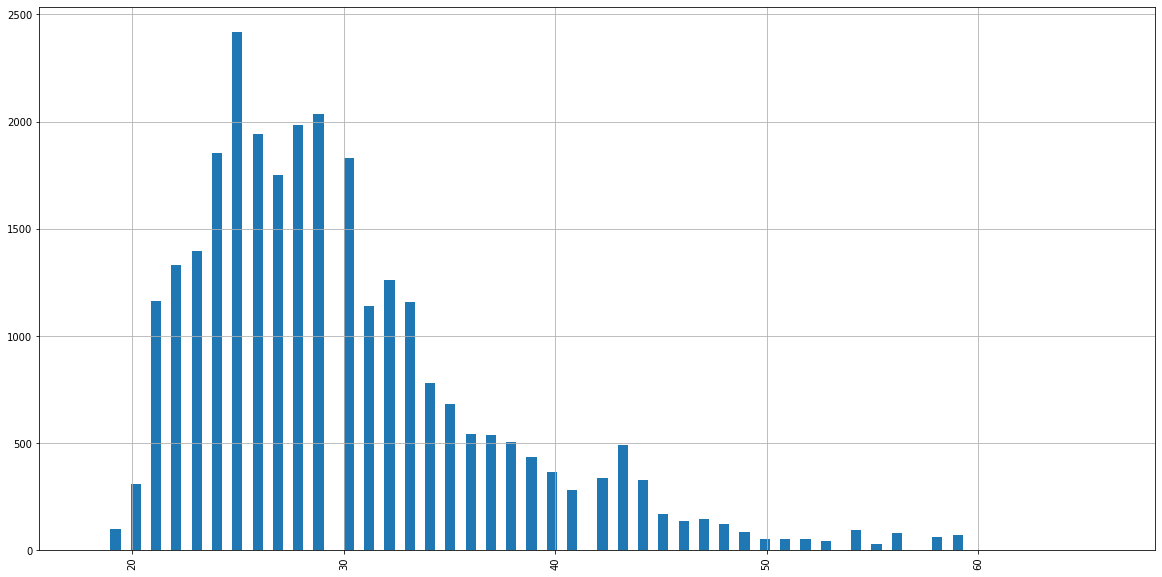

In [29]:
dataframe['edad'].hist(bins=100,xlabelsize=10,xrot=90,figsize=(20,10))

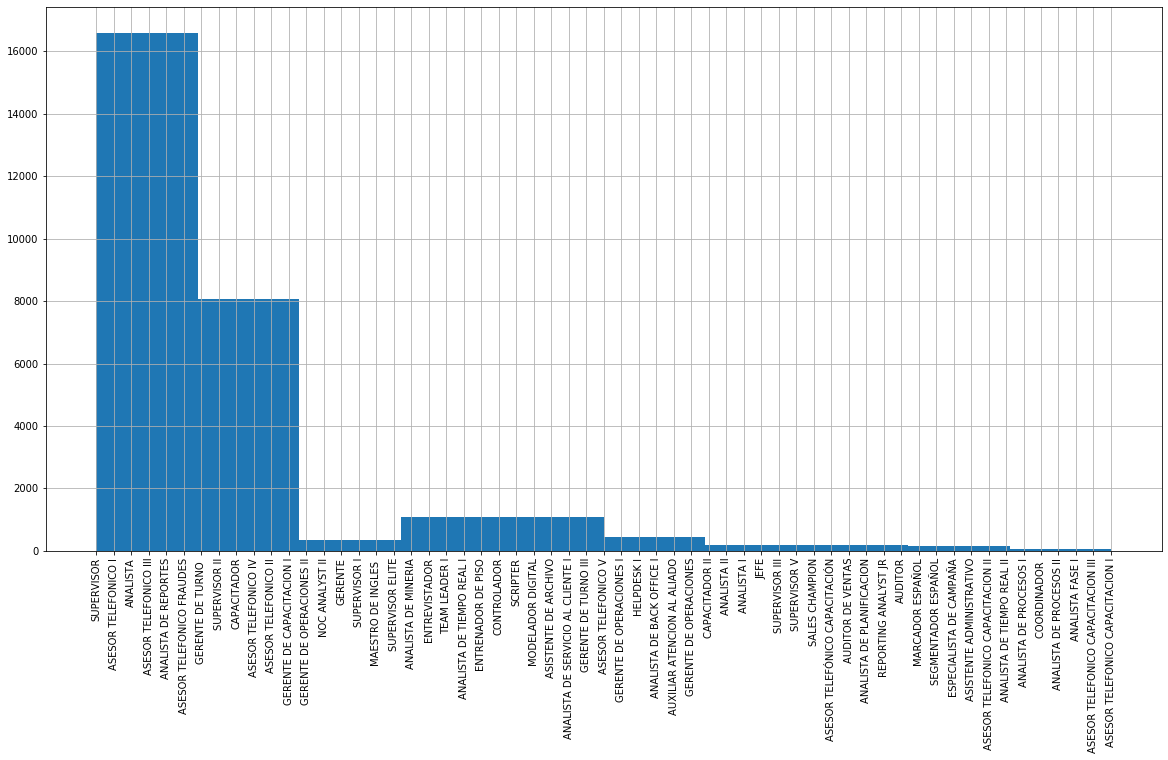

In [30]:
dataframe['Puesto'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

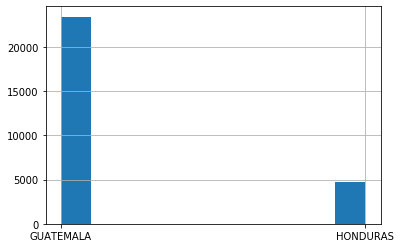

In [31]:
dataframe['Pais'].hist()

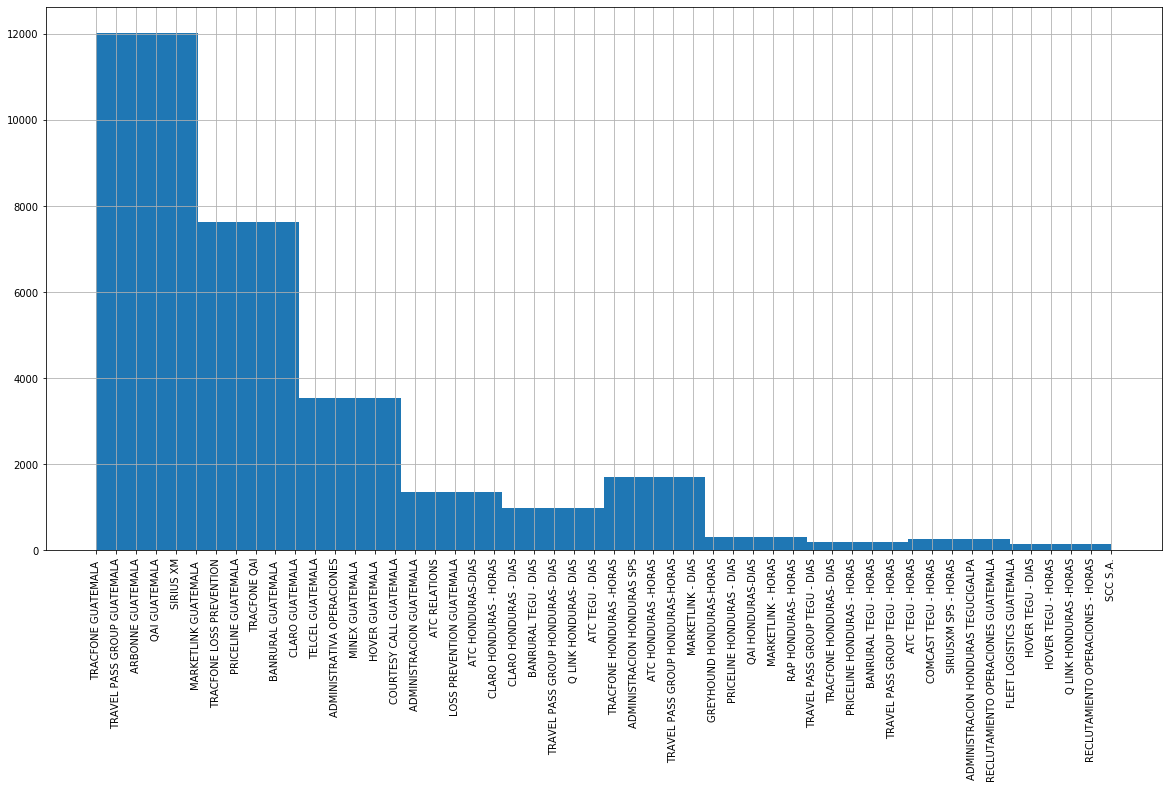

In [32]:
dataframe['cuenta'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

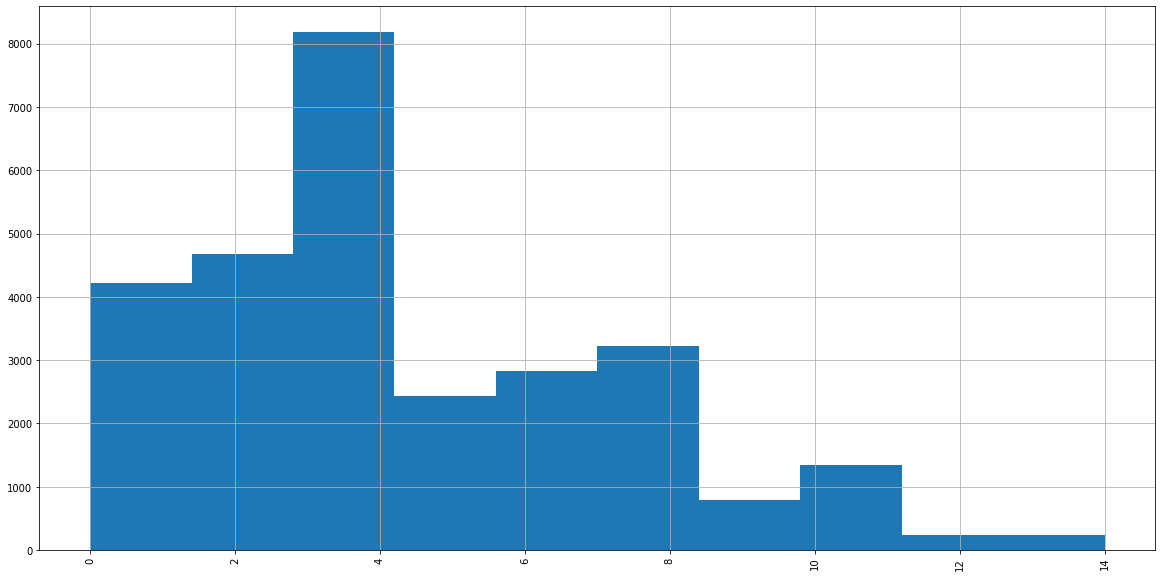

In [33]:
dataframe['Permanencia_en_anios'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

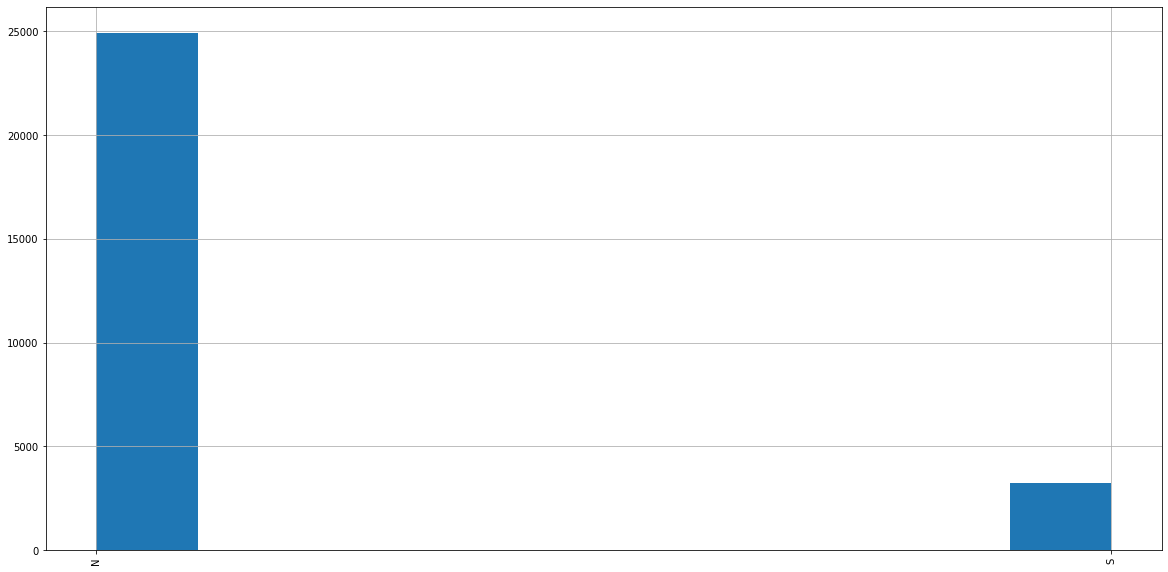

In [34]:
dataframe['Nomina_Por_Hora'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

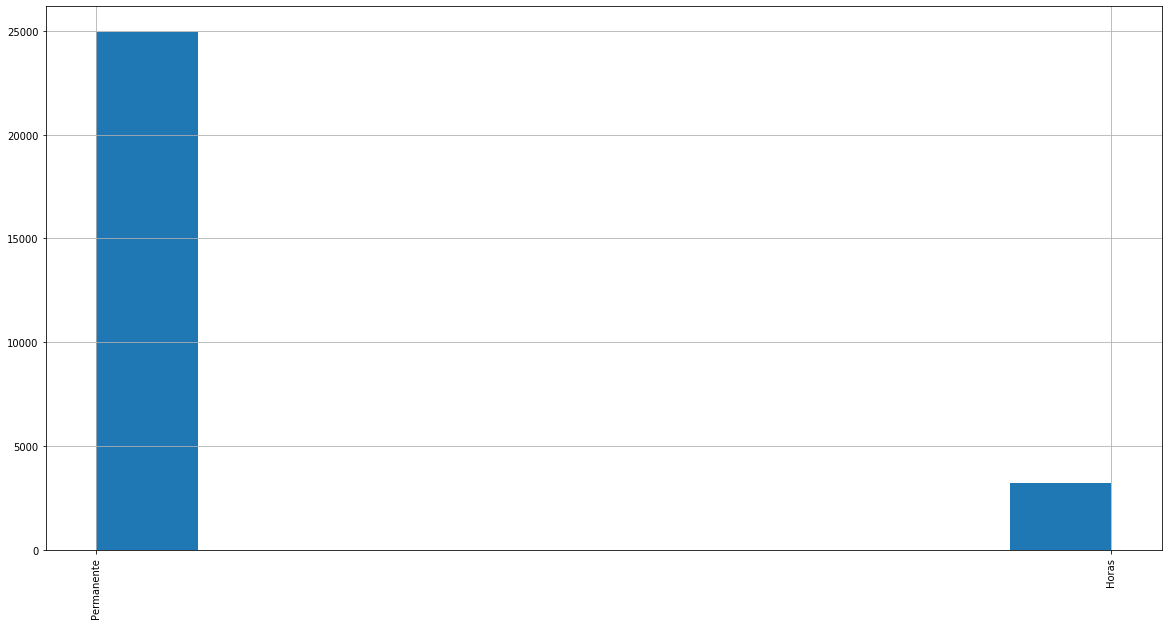

In [35]:
dataframe['Tipo_Salario_Contrato'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

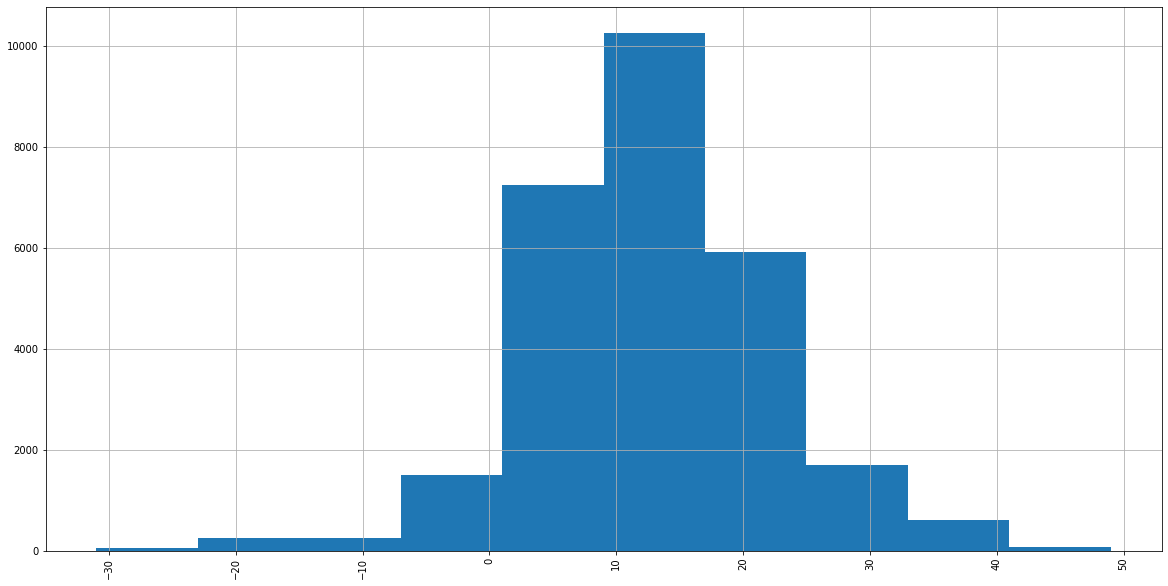

In [36]:
dataframe['Dias_Pendientes'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

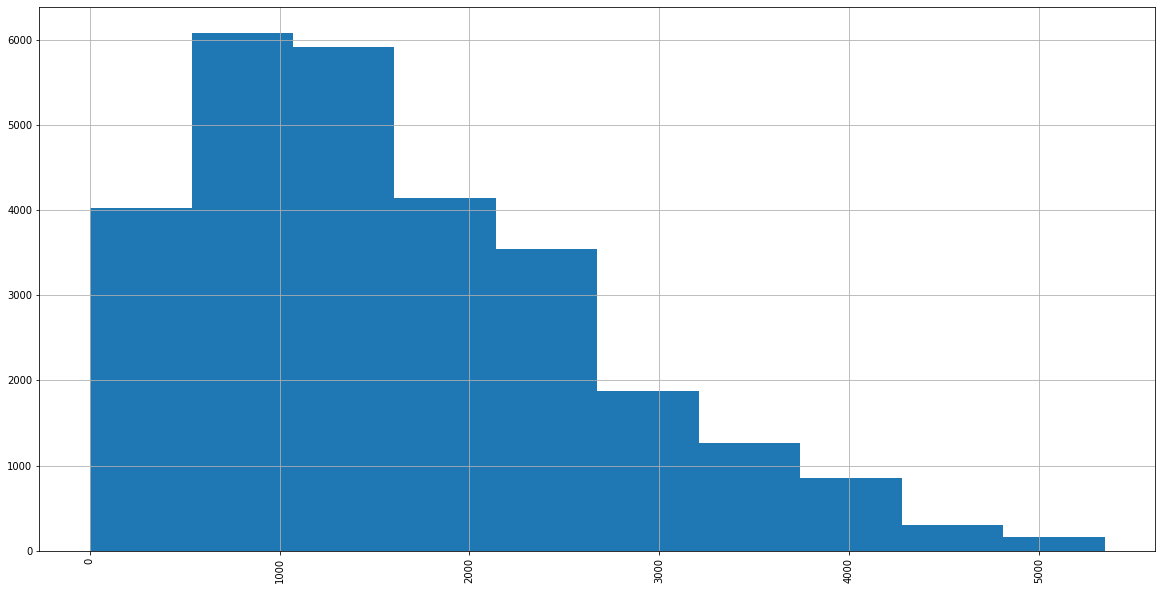

In [37]:
dataframe['DiasLaborados'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

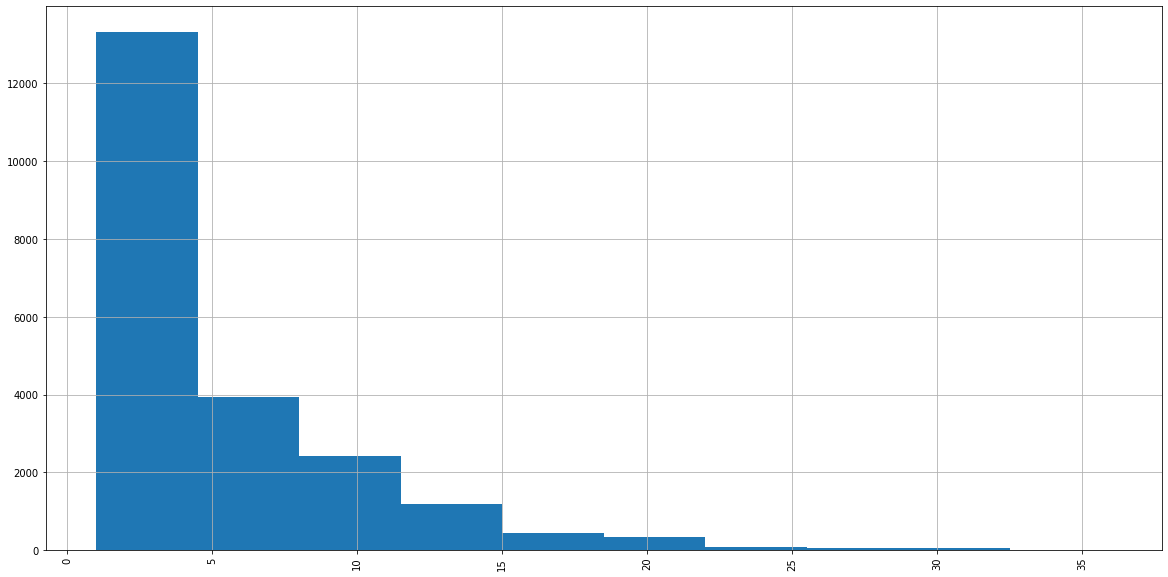

In [38]:
dataframe['Numero_Amonestaciones'].hist(xlabelsize=10,xrot=90,figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B38567F688>,
      dtype=object)

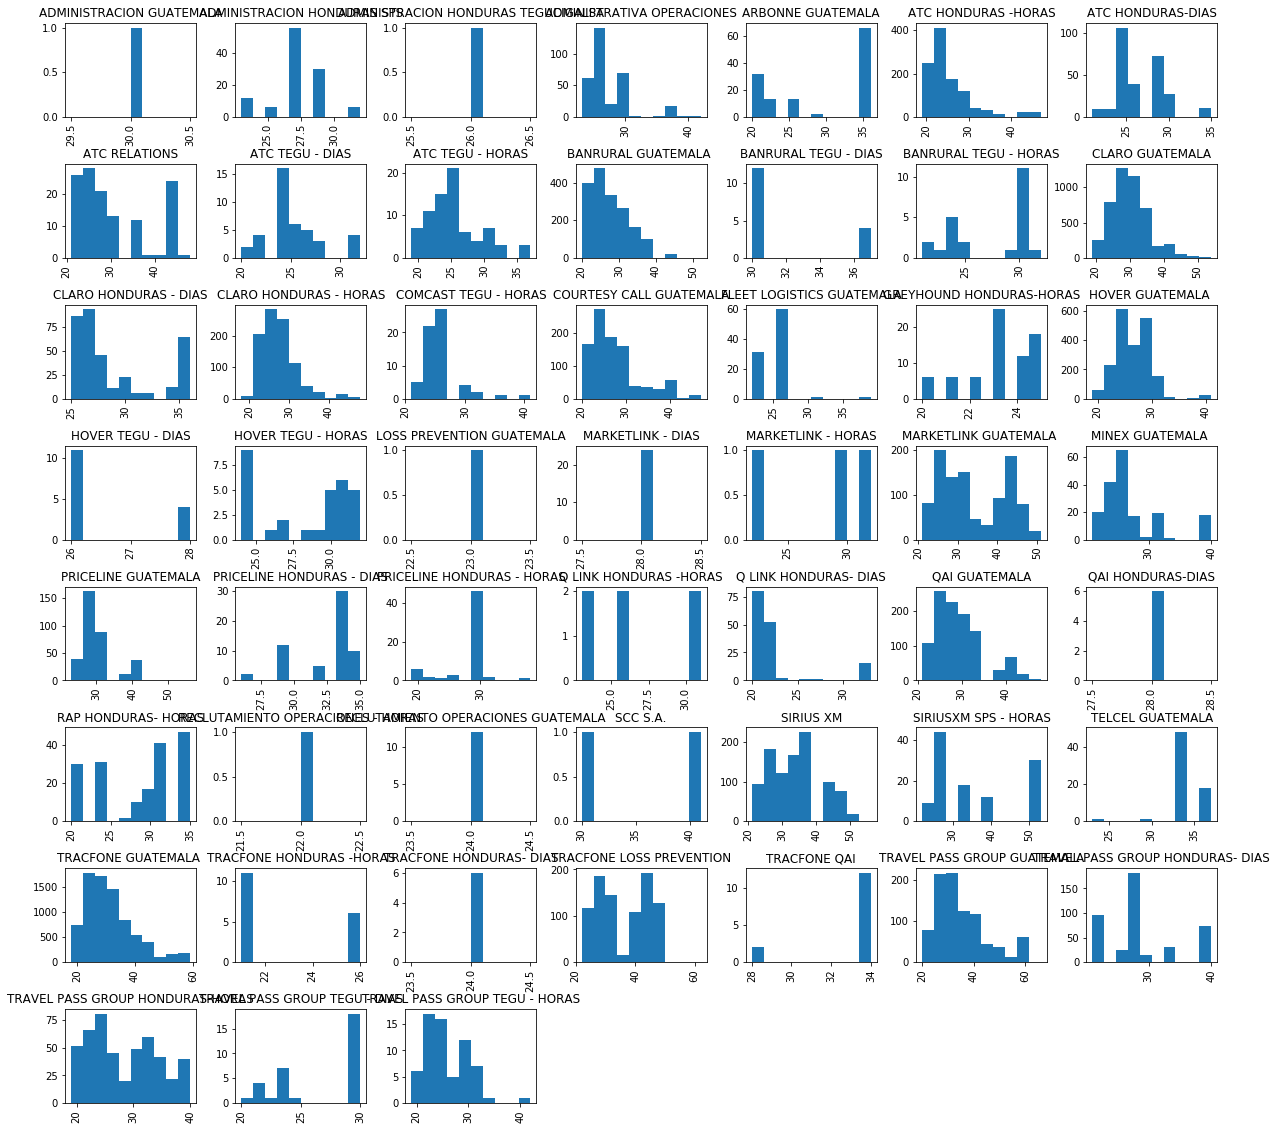

In [160]:
dataframe[['edad','cuenta']].hist(by='cuenta',xrot=90,figsize=(20,20))

In [164]:
dataframe.columns

Index(['Codigo_Empleado', 'Puesto', 'Pais', 'Fecha_Ingreso', 'edad',
       'generacion', 'DEPARTMENT_NAME', 'ID_DEPARTAMENTO', 'unidad',
       'Departamento', 'Municipio', 'Nacionalidad', 'GENERO', 'Site',
       'Tipo_Salario_Contrato', 'Estatus_Empleado', 'generacion_na', 'Year_TP',
       'Month_TP', 'Cuenta_TP', 'cuenta', 'Nomina_Por_Hora',
       'Permanencia_en_anios', 'DiasLaborados', 'DiasAcumulados',
       'DiasGozados', 'Dias_Pendientes'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B39ACF3D88>,
      dtype=object)

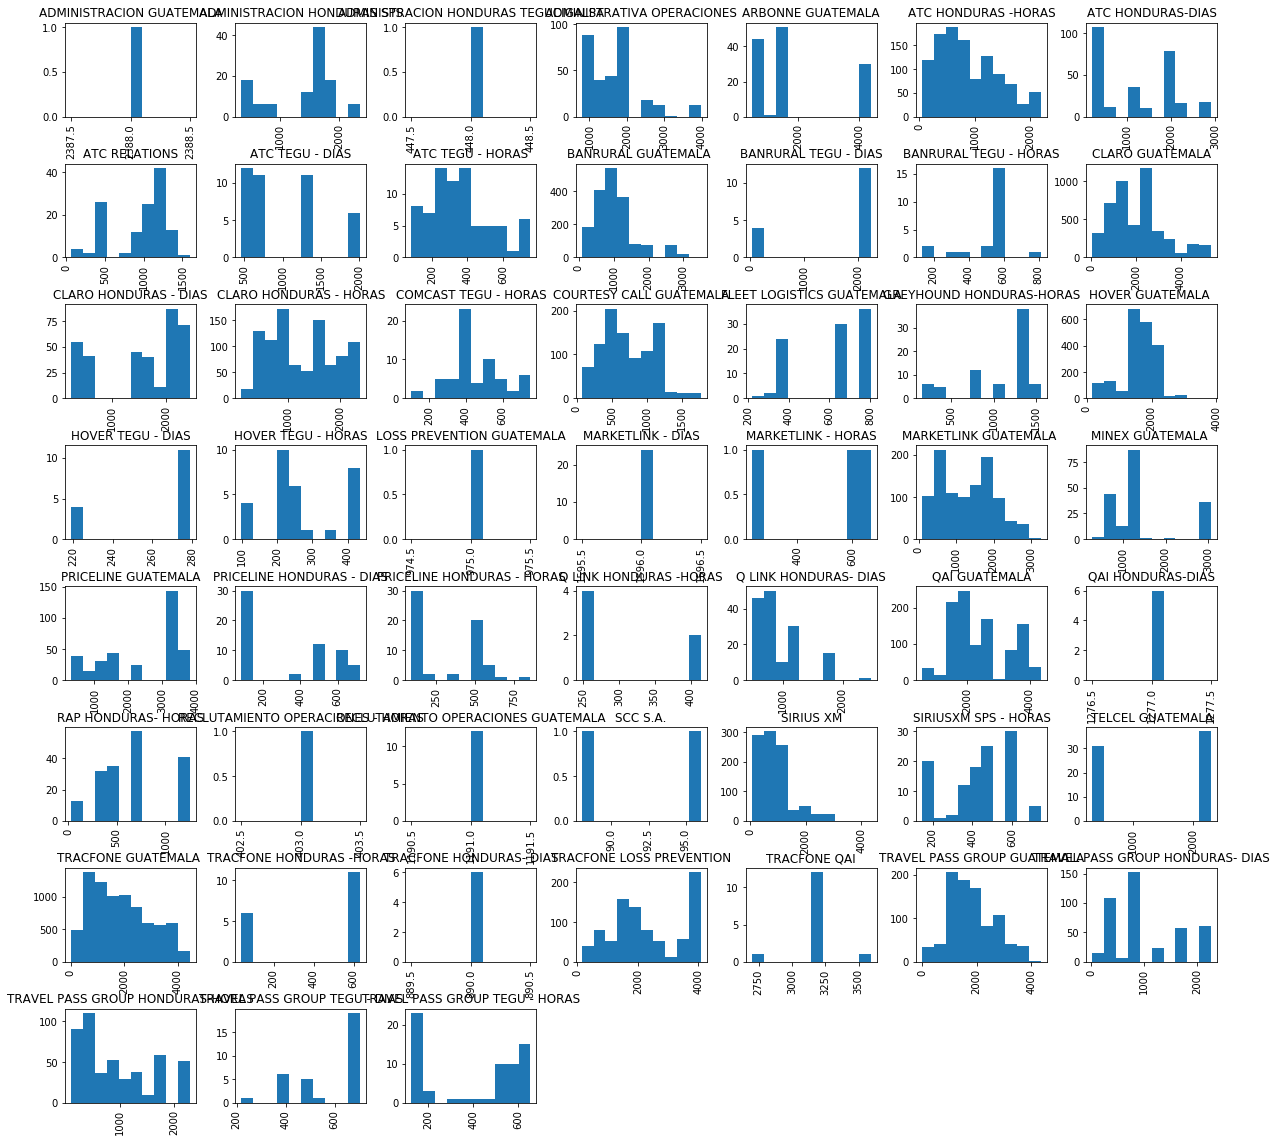

In [165]:
dataframe[['DiasLaborados','cuenta']].hist(by='cuenta',xrot=90,figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002922B78E448>,
      dtype=object)

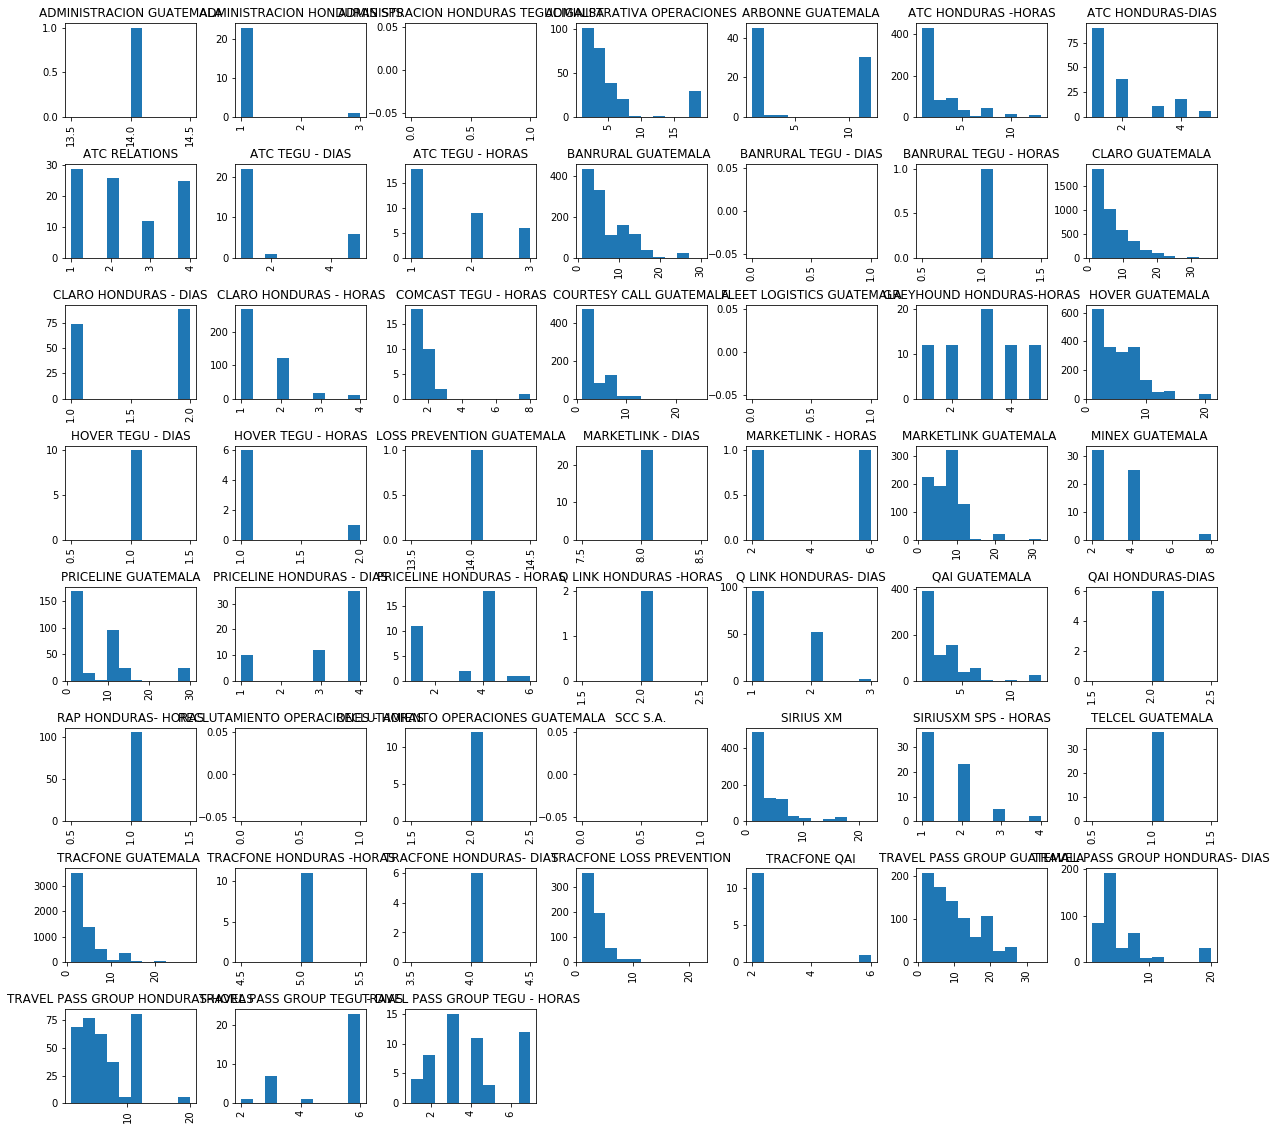

In [39]:
dataframe[['Numero_Amonestaciones','cuenta']].hist(by='cuenta',xrot=90,figsize=(20,20))